In [5]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("Cars.csv")

In [11]:
df.columns =['Maint', 'Buying', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class Values']

In [12]:
df

,Maint,Buying,Doors,Persons,Lug_boot,Safety,Class Values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [17]:
df.describe()

,Maint,Buying,Doors,Persons,Lug_boot,Safety,Class Values
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Maint         1727 non-null   object
 1   Buying        1727 non-null   object
 2   Doors         1727 non-null   object
 3   Persons       1727 non-null   object
 4   Lug_boot      1727 non-null   object
 5   Safety        1727 non-null   object
 6   Class Values  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [21]:
df.isnull().sum()

Maint           0
Buying          0
Doors           0
Persons         0
Lug_boot        0
Safety          0
Class Values    0
dtype: int64

In [22]:
# Frequency counts of all categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].value_counts()}")

Maint: Maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Buying: Buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
Doors: Doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
Persons: Persons
4       576
more    576
2       575
Name: count, dtype: int64
Lug_boot: Lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
Safety: Safety
med     576
high    576
low     575
Name: count, dtype: int64
Class Values: Class Values
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class Values'], axis=1), df['Class Values'], test_size=0.4, random_state=0)

In [31]:
print("X_train Shape= ", X_train.shape)
print("X_test Shape= ", X_test.shape)

X_train Shape=  (1036, 6)
X_test Shape=  (691, 6)


In [29]:
print(X_train.dtypes)

Maint       object
Buying      object
Doors       object
Persons     object
Lug_boot    object
Safety      object
dtype: object


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_100 = RandomForestClassifier(n_estimators=100)
rf_100.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Extract feature importance scores using a trained Random Forest Classifier model
importance_scores = rf_100.feature_importances_

# Create a dataframe to display feature importance scores in descending order
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display feature importance scores
print(feature_importance_df)

    Feature  Importance
5    Safety    0.263030
3   Persons    0.233255
0     Maint    0.184040
1    Buying    0.157219
4  Lug_boot    0.087382
2     Doors    0.075074


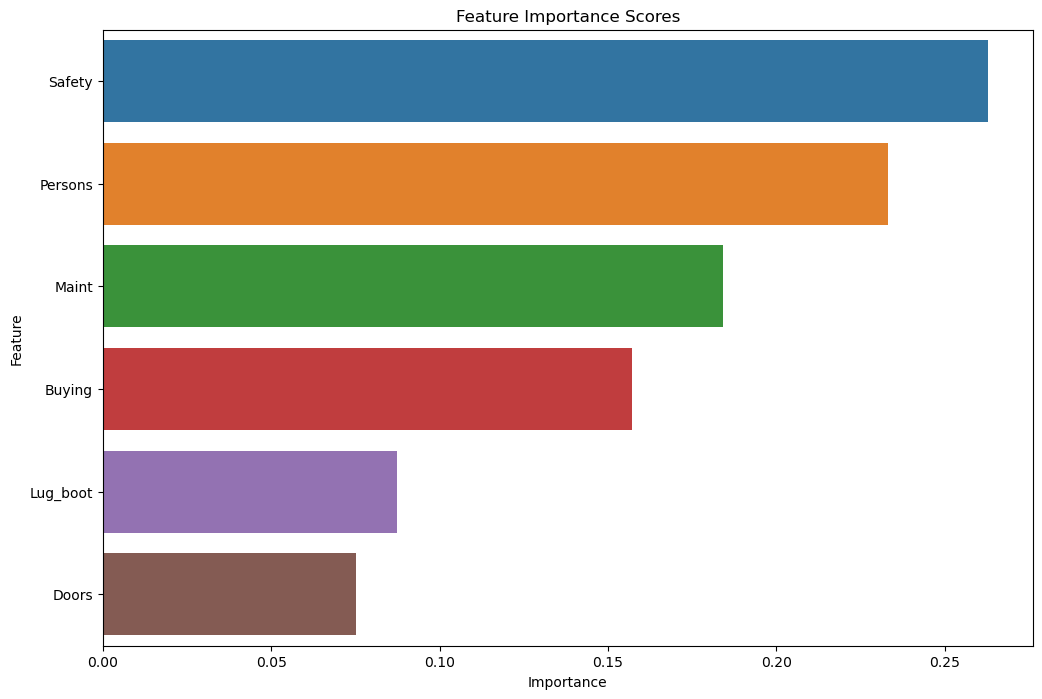

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Scores')
plt.show()

In [36]:
selected_features = feature_importance_df['Feature'][:3]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(n_estimators=100)

rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier()

In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, rf_selected.predict(X_test_selected)))

[[115   0  35   7]
 [ 24   0   0   4]
 [ 32   0 440   1]
 [ 24   0   0   9]]


In [38]:
confusion_matrix = confusion_matrix(y_test, rf_selected.predict(X_test_selected))

print(confusion_matrix)

[[115   0  35   7]
 [ 24   0   0   4]
 [ 32   0 440   1]
 [ 24   0   0   9]]


In [43]:
from sklearn.metrics import classification_report 

class_report = classification_report(y_test, rf_selected.predict(X_test_selected))
print(class_report)

              precision    recall  f1-score   support

         acc       0.59      0.73      0.65       157
        good       0.00      0.00      0.00        28
       unacc       0.93      0.93      0.93       473
       vgood       0.43      0.27      0.33        33

    accuracy                           0.82       691
   macro avg       0.49      0.48      0.48       691
weighted avg       0.79      0.82      0.80       691



C:\Users\aida-lab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aida-lab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aida-lab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
